In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
from utils import *
from algorithms import bfs, a_star
import genetic_algorithm

In [3]:
#!python -m minihack.scripts.env_list

In [10]:
def visualize_generation(best_path, generation):
    """
    Callback function to visualize the best path of each generation.
    
    :param best_path: The best path found in the current generation
    :param generation: Current generation number
    """
    # Clear previous plot
    plt.clf()
    
    # Plot the game map
    plt.imshow(game[:coordinates[0], :coordinates[1]])
    
    # Ensure the path is not empty and actually moves
    if len(best_path) > 1:
        # Plot the path
        path_x = [pos[1] for pos in best_path]
        path_y = [pos[0] for pos in best_path]
        plt.plot(path_x, path_y, 'r-', linewidth=2, marker='o')
    
    # Explicitly plot the target
    plt.plot(target[1], target[0], 'ro', markersize=10, label='Target')
    
    # Explicitly plot the start
    plt.plot(start[1], start[0], 'go', markersize=10, label='Start')
    
    # Add generation info
    plt.title(f'Best Path - Generation {generation}')
    plt.legend()
    
    # Refresh display
    display.display(plt.gcf())
    display.clear_output(wait=True)


def visualize_ascii_generation(best_path, generation):
    """
    Callback function to visualize the best path in the ASCII map for each generation.
    
    :param best_path: The best path found in the current generation
    :param generation: Current generation number
    """
    # Print the generation information
    print(f"Best Path - Generation {generation}")

    # Create a copy of the game map
    ascii_map = [list(row) for row in state['chars']]

    # Mark the start and target positions
    ascii_map[start[0]][start[1]] = '<'
    ascii_map[target[0]][target[1]] = '>'

    # Mark the best path
    for x, y in best_path:
        ascii_map[x][y] = 'o'

    # Print the ASCII map with the path
    print('\n'.join([''.join(map(str, row)) for row in ascii_map]))

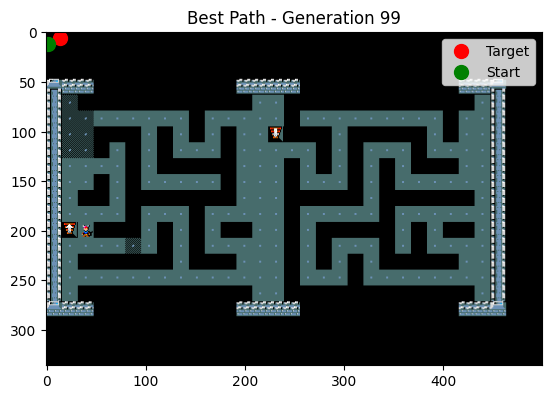

In [5]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
state = env.reset()

coordinates = [500, 500]

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

#game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

# Starting of the simulation
population_size = 10
step_limit = 20
population = genetic_algorithm.generate_initial_population(game_map, start, target, population_size, step_limit)

print(population)

path = genetic_algorithm.genetic_algorithm(
    game_map, 
    start, 
    target, 
    population, 
    visualization_callback=visualize_generation
)
#path = bfs(game_map, start, target)

actions = actions_from_path(start, path[1:])

print(game_mex)

image = plt.imshow(game[:coordinates[0], :coordinates[1]])
for action in actions:
    s, _, done, _ = env.step(action)  # `done` say to us when the simulation is over
    image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])
    
    
    # If the simulation is done
    if done:
        # If player's hp are equal to 0 it means that he is dead
        if hp == 0: 
            display_game_over()
            break  # Interrupt the smulation

        # Else you have won    
        display_victory()
        break  # Interrupt the smulation


    # Update the game visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)
    

In [11]:
# Create our environment specifying the Map and what keys we have to observe
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
state = env.reset()

# Print the ASCII map
print("ASCII Map:")
print('\n'.join([''.join(map(chr, row)) for row in state['chars']]))

# Get the start and target positions
start = get_player_location(state['chars'])
target = get_target_location(state['chars'])

print("Agent position:", start)
print("Target position:", target)

# Add Game Over function
def display_game_over():
    print("Game Over: You were killed by monsters!")

# Add Victory function
def display_victory():
    print("Victory: You reached the target!")

# Starting of the simulation
population_size = 10
step_limit = 20
population = genetic_algorithm.generate_initial_population(state['chars'], start, target, population_size, step_limit)

print(population)

path = genetic_algorithm.genetic_algorithm(
    state['chars'],
    start,
    target,
    population,
    visualization_callback=visualize_ascii_generation
)

actions = actions_from_path(start, path[1:])

print(state['message'])

# Visualize the ASCII map at each step
for action in actions:
    s, _, done, _ = env.step(action)
    print("\nASCII Map:")
    print('\n'.join([''.join(map(chr, row)) for row in s['chars']]))

    # If the simulation is done
    if done:
        # If player's hp are equal to 0 it means that he is dead
        if s['blstats'][6] == 0:
            display_game_over()
            break  # Interrupt the simulation

        # Else you have won
        display_victory()
        break  # Interrupt the simulation

ASCII Map:
                                                                               
                                                                               
                                                                               
---         ----          ---                                                  
|.           ..            .|                                                  
|.............. ....... ....|                                                  
|..         ...   .     . ..|                                                  
|...... ....... ... ..... ..|                                                  
|..   . .    .. .   .     ..|                                                  
|.. ... ....... ..... ... ..|                                                  
|.. . .     ...       . . ..|                                                  
|.. . . ... ..> ..... . . ..|                                                  
|.. .   . . ... .   . . . ..|

Exception: x and y can't change at the same time. oblique moves not allowed!